In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('jobs_dataset_cleaned.csv')

In [3]:
df.head()

,Position,Job Type,Rate,Location,Recruiter,Reference,Description,Python,Power BI,SQL,R,Azure,Tableau,AWS,Google Analytics,Machine Learning
0,Data Architect,Contract,675.0,Coventry,Crimson Limited,JS-CR/CR/014020,Data Architect - SaaS/Workday/Finance - Covent...,0,0,0,0,0,0,0,0,0
1,Data Architect,Permanent,80000.0,Solihull,Harvey Nash,JS-BBBH78205,"Data ArchitectPermanentc/£80,000 p/a + bonus +...",0,0,1,0,1,0,0,0,0
2,Data Analyst,Contract,337.5,Birmingham,Harvey Nash,JS-BBBH78228,Data analystLocation: BirminghamEmployment typ...,1,0,1,0,0,1,0,0,0
3,Data Analyst,Contract,325.0,Birmingham,Adalta Recruitment Solutions Ltd,JS7425,"Data Analyst - HR, Insights, Diversity Locat...",0,0,0,0,0,1,0,0,0
4,Data Architect,Permanent,75000.0,Birmingham,Cloud Decisions,JSKF/LM/810144,Data Solutions ArchitectRemote role (UK based)...,1,1,1,0,1,1,0,0,0


In [4]:
df.columns

Index(['Position', 'Job Type', 'Rate', 'Location', 'Recruiter', 'Reference',
       'Description', 'Python', 'Power BI', 'SQL', 'R', 'Azure', 'Tableau',
       'AWS', 'Google Analytics', 'Machine Learning'],
      dtype='object')

In [5]:
df.describe()

,Rate,Python,Power BI,SQL,R,Azure,Tableau,AWS,Google Analytics,Machine Learning
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,40495.676471,0.432353,0.226471,0.470588,0.041176,0.252941,0.100000,0.238235,0.017647,0.073529
std,37317.922438,0.496133,0.419164,0.499870,0.198991,0.435338,0.300442,0.426632,0.131859,0.261388
min,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43472.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68069.875000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,250000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Initial Categorical Feature Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Position          340 non-null    object 
 1   Job Type          340 non-null    object 
 2   Rate              340 non-null    float64
 3   Location          340 non-null    object 
 4   Recruiter         340 non-null    object 
 5   Reference         340 non-null    object 
 6   Description       340 non-null    object 
 7   Python            340 non-null    int64  
 8   Power BI          340 non-null    int64  
 9   SQL               340 non-null    int64  
 10  R                 340 non-null    int64  
 11  Azure             340 non-null    int64  
 12  Tableau           340 non-null    int64  
 13  AWS               340 non-null    int64  
 14  Google Analytics  340 non-null    int64  
 15  Machine Learning  340 non-null    int64  
dtypes: float64(1), int64(9), object(6)
memory us

In [7]:
df_cat = df[['Position', 'Job Type', 'Location']]

graph for Position: total - 4


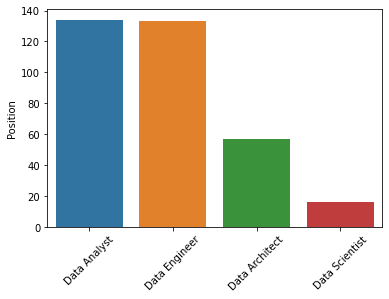

graph for Job Type: total - 3


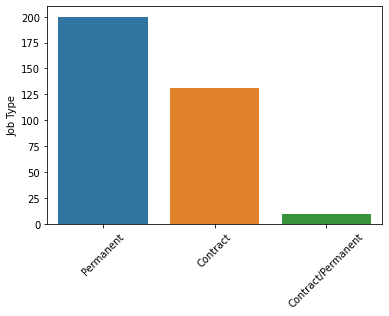

graph for Location: total - 44


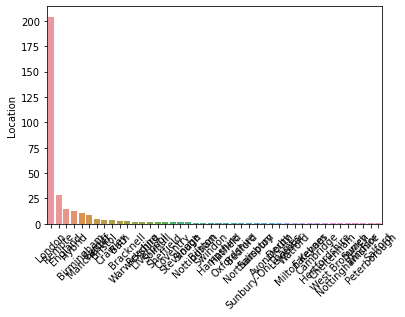

In [8]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total - %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.show()

# Job Type


<AxesSubplot:>

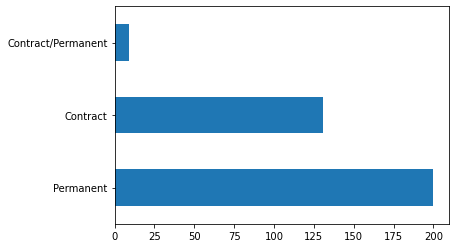

In [9]:
df['Job Type'].value_counts().plot.barh()

In [10]:
df_cont_perm = df[df['Job Type'].str.contains('Contract/Permanent') == True]
df_cont_perm['Description'] 

9      Data AnalystBracknell (London area)Fixed term ...
52     Data AnalystThis client are helping companies ...
53     Data Analyst - 2 Yr Fixed Term Contract - £356...
92     Data AnalystUtilitiesRemote/Onsite in Warwick ...
146    Fixed-term contract: 12 months Poplar HARCA is...
268    SAP S/4/HANA Data Analyst - Sap Data Integrati...
269    SAP S/4/HANA Data Analyst - Sap Data Integrati...
276    SAP Logistics Business Analyst/Testing & Data ...
277    SAP Logistics Business Analyst/Testing & Data ...
Name: Description, dtype: object

# Salary

In [11]:
pd.pivot_table(df, index= ['Position', 'Job Type'], values= 'Rate')

Rate
Position       Job Type                        
Data Analyst   Contract              517.537736
               Contract/Permanent  43488.388889
               Permanent           57431.583333
Data Architect Contract              687.000000
               Permanent           83018.240741
Data Engineer  Contract              607.488889
               Permanent           69728.732955
Data Scientist Contract              600.000000
               Permanent           60558.692308

## Contract

<AxesSubplot:xlabel='Position', ylabel='Rate'>

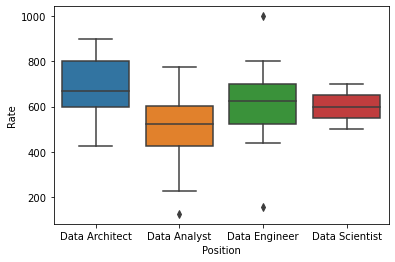

In [16]:
sns.boxplot(x="Position", y= "Rate", data=df[df['Job Type'] == 'Contract'])

## Permanent

<AxesSubplot:xlabel='Position', ylabel='Rate'>

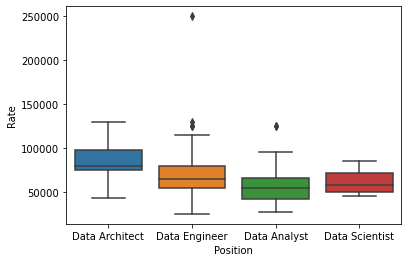

In [17]:
sns.boxplot(x="Position", y= "Rate", data=df[df['Job Type'] == 'Permanent'])

Huge outlier for Data Engineer, may be worth looking to that role... 
(also because it may be skeweing the averages)

# Location

In [37]:
pd.pivot_table(df_perm, index = ['Location', 'Position'], values = 'Rate').sort_values('Rate', ascending = False)

,,Rate
Location,Position,
London,Data Architect,92931.428571
England,Data Architect,80000.000000
Solihull,Data Architect,80000.000000
Birmingham,Data Architect,78750.000000
Nottingham,Data Architect,77500.000000
London,Data Engineer,76617.294643
Watford,Data Engineer,75000.000000
Hybrid,Data Architect,73500.000000
Reading,Data Engineer,70000.000000


## Skills

In [27]:
df_perm = df[df['Job Type'] == 'Permanent']
df_perm.corr()

,Rate,Python,Power BI,SQL,R,Azure,Tableau,AWS,Google Analytics,Machine Learning
Rate,1.000000,0.088379,-0.172056,-0.111968,-9.922555e-02,6.481436e-02,-0.110297,0.143818,-0.122896,-0.067286
Python,0.088379,1.000000,-0.153548,0.221644,2.082483e-01,-1.154932e-02,0.091760,0.078912,0.035235,0.203353
Power BI,-0.172056,-0.153548,1.000000,0.195073,4.069691e-02,-8.313373e-02,0.362077,-0.110577,0.111738,-0.112994
SQL,-0.111968,0.221644,0.195073,1.000000,-1.226955e-02,2.197891e-01,0.202606,-0.038415,0.150792,-0.036281
R,-0.099226,0.208248,0.040697,-0.012270,1.000000e+00,-3.863899e-17,0.107905,-0.130456,0.130744,0.029278
Azure,0.064814,-0.011549,-0.083134,0.219789,-3.863899e-17,1.000000e+00,-0.068916,0.190855,-0.092450,-0.010351
Tableau,-0.110297,0.091760,0.362077,0.202606,1.079046e-01,-6.891620e-02,1.000000,-0.094326,0.275786,-0.098750
AWS,0.143818,0.078912,-0.110577,-0.038415,-1.304560e-01,1.908545e-01,-0.094326,1.000000,-0.102338,0.121300
Google Analytics,-0.122896,0.035235,0.111738,0.150792,1.307441e-01,-9.245003e-02,0.275786,-0.102338,1.000000,-0.048805
Machine Learning,-0.067286,0.203353,-0.112994,-0.036281,2.927753e-02,-1.035117e-02,-0.098750,0.121300,-0.048805,1.000000


<AxesSubplot:>

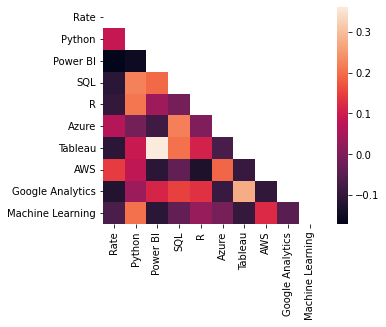

In [32]:
mask = np.triu(np.ones_like(df_perm.corr()))
sns.heatmap(df_perm.corr(), square=True, mask= mask)

In [38]:
df_cont = df[df['Job Type'] == 'Contract']
df_cont.corr()

,Rate,Python,Power BI,SQL,R,Azure,Tableau,AWS,Google Analytics,Machine Learning
Rate,1.000000,-0.089037,-0.114483,-0.153735,-0.048525,0.255653,-0.127879,0.153180,-0.098132,0.213388
Python,-0.089037,1.000000,0.202694,0.419229,-0.068801,-0.006773,0.174333,0.065483,0.115331,-0.061617
Power BI,-0.114483,0.202694,1.000000,0.401298,0.267668,-0.047015,0.274283,-0.184183,0.219751,-0.101786
SQL,-0.153735,0.419229,0.401298,1.000000,0.001243,-0.045088,0.247236,-0.046331,0.108104,0.053717
R,-0.048525,-0.068801,0.267668,0.001243,1.000000,0.055864,0.178606,0.012790,-0.017471,-0.050803
Azure,0.255653,-0.006773,-0.047015,-0.045088,0.055864,1.000000,-0.221364,0.120425,-0.053991,0.057237
Tableau,-0.127879,0.174333,0.274283,0.247236,0.178606,-0.221364,1.000000,-0.165947,-0.031539,-0.091708
AWS,0.153180,0.065483,-0.184183,-0.046331,0.012790,0.120425,-0.165947,1.000000,-0.040474,0.217473
Google Analytics,-0.098132,0.115331,0.219751,0.108104,-0.017471,-0.053991,-0.031539,-0.040474,1.000000,-0.022368
Machine Learning,0.213388,-0.061617,-0.101786,0.053717,-0.050803,0.057237,-0.091708,0.217473,-0.022368,1.000000


<AxesSubplot:>

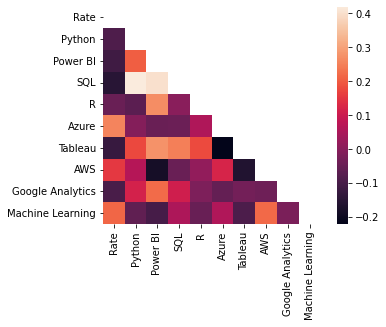

In [39]:
mask = np.triu(np.ones_like(df_cont.corr()))
sns.heatmap(df_cont.corr(), square=True, mask= mask)

In [12]:
pd.pivot_table(df, index= ['Position', 'Job Type', 'Python'], values= 'Rate')

Rate
Position       Job Type           Python              
Data Analyst   Contract           0         501.785714
                                  1         548.166667
               Contract/Permanent 0       43549.437500
                                  1       43000.000000
               Permanent          0       51879.422222
                                  1       66685.185185
Data Architect Contract           0         699.326923
                                  1         606.875000
               Permanent          0       83869.239130
                                  1       78125.000000
Data Engineer  Contract           0         637.023810
                                  1         581.645833
               Permanent          0       67531.205882
                                  1       71112.361111
Data Scientist Contract           0         600.000000
                                  1         600.000000
               Permanent          1       60558.692308